# Is the City of Pittsburgh Truly a Bike-Friendly City?
### By: Jorge Cervantes, Ruochong Zhu, and Tony Robol
### Mentored by: Kushagra Tiwari

#### Data Sources:


## Introduction
The Bike+ Master Plan for the City of Pittsburgh was established in June of 2020, with the goal of making Pittsburgh a more bike-friendly city. The plan establishes a vision to continue building a safe, comfortable, and convenient bike network for all types of riders and for all types of trips. The plan also includes mobility goals for Pittsburgh, which are as follows:

##### No one dies traveling on city streets
##### All households can access fresh fruits and vegetables within 20 minutes travel of home, without requiring a private automobile.
##### Walking and bicycling are the most joyful mode for short distance trips.
##### No household must spend more than 45% of household income for basic housing and mobility.
##### Pittsburgh streets and right of ways reflect the values of our community.

The Bike+ Master Plan also includes the MoveForwardPGH Intiative, which is a collaboration between Department of Mobility and Infrastructure (DOMI), BikePGH and POGOH (formerly Healthy Ride). This initiative serves to engage the community throughout the process of installing new bike-friendly connections throughout Pittsburgh.

In this project, we seek to examine if Pittsburgh truly is a bike-friendly city. We will do this primarily through analysis of the available data through the POGOH data available to us through the WPRDC, which includes data through 60 bike stations. To attack this question, we will look at measures such as slope of roads, average distance from one station to all others, frequency of travel from one station to another, and categorization of each station as on a university campus or not.

### Data Downloads and Renaming Instructions

1. **POGOH Trip Data (Nov 2022 - Oct 2023)**  
   Download the dataset from [CKAN - POGOH Trip Data](https://data.wprdc.org/dataset/pogoh-trip-data).

2. **On-road Bicycle Pavement Markings**  
   Download and rename the file to "NOAH bike lane.csv" from [CKAN - On-road Bicycle Pavement Markings](https://data.wprdc.org/dataset/on-road-bicycle-pavement-markings).  
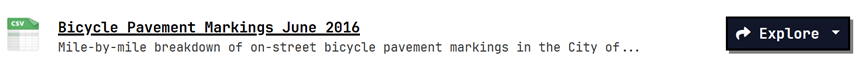

3. **POGOH Station Locations (Oct 2023)**  
   Download and ensure the file is named "pogoh-station-locations-october-2023.xlsx" from [CKAN - POGOH Station Locations](https://data.wprdc.org/dataset/station-locations).  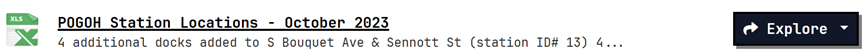

4. **Bicycle Lane GeoJSON Files**  
   Download and rename the file to "pittsburghbikelane(3).geojson" and download another copy as "pittsburghbikeinfrastructure (4).geojson" from [CKAN - On-road Bicycle Pavement Markings](https://data.wprdc.org/dataset/on-road-bicycle-pavement-markings).  
 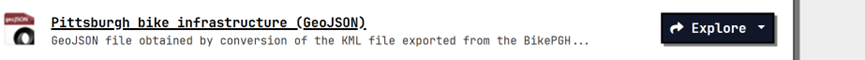

5. **25% or Greater Slope Shapefile**  
   Download and rename the file to "25%_or_Greater_Slope-shp" from [City of Pittsburgh Data Download](https://pghgishubpittsburghpa.opendata.arcgis.com/datasets/pittsburghpa::25-or-greater-slope/explore).

6. **Pittsburgh Neighborhoods Shapefile**  
   Download and rename the folder to "pittsburghpaneighborhoods" from [CKAN - Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2).  
   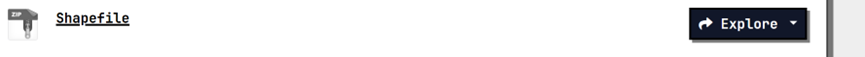

7. **City of Pittsburgh Traffic Count**  
   Download and ensure the file is named "Bike Traffic Count Data.csv" from [CKAN - City of Pittsburgh Traffic Count](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh).  
  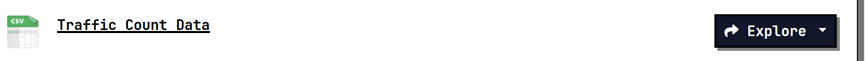

8. **Overdose Quantities in Communities CSV**  
   Download and rename the file to "overdose by neighborhood.csv" from [CKAN - Allegheny County Human Services Community Profiles](https://data.wprdc.org/dataset/allegheny-county-human-services-community-profiles/resource/13363e19-9e54-4673-be03-4fe2fa587741).

9. **City of Pittsburgh Neighborhood Population 2020**  
   Download and rename the file to "race population in community.csv" from [CKAN - 2020 Census Redistricting Data Extracts](https://data.wprdc.org/dataset/2020-census-redistricting-data-extracts/resource/a8414ed5-c50f-417e-bb67-82b734660da6).  
   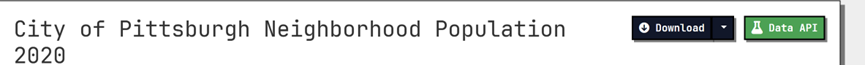

Note: Please put all the datasets in the same file with the code

To begin, we will initiate some of the fundamental Python packages to be used in this project.

In [2]:
import pandas as pd
import numpy as np
import os
import re
import math
import matplotlib.pyplot as plt

## SET THE CORRECT WORKING DIRECTORY USING THE CODE BLOCK BELOW

In [5]:
# Make sure working directory is correct
##os.chdir("SET CORRECT DIRECTORY HERE")
os.getcwd()
os.chdir("/Users/Tony/Downloads")

### Reading in and Cleaning Data
We looked at the past twelve months of ridership data, comprising the past year-to-date.

In [6]:
# Read in data

november = pd.read_excel("november-2022.xlsx")
december = pd.read_excel("december-2022.xlsx")
january = pd.read_excel("january-2023.xlsx")
february = pd.read_excel("february-2023.xlsx")
march = pd.read_excel("march-2023.xlsx")
april = pd.read_csv("pogho-trip-data-2023-04.csv")
may = pd.read_excel("may-2023.xlsx")
june = pd.read_excel("june-2023.xlsx")
july = pd.read_excel("july-2023.xlsx")
august = pd.read_excel("august-2023.xlsx")
september = pd.read_excel("september-2023.xlsx")
october = pd.read_excel("october-2023.xlsx")

print(october.head(10))

  Closed Status  Duration  Start Station Id          Start Date  \
0        NORMAL       249                20 2023-10-31 23:51:20   
1        NORMAL       490                34 2023-10-31 23:50:15   
2        NORMAL       985                10 2023-10-31 23:47:39   
3        NORMAL        99                51 2023-10-31 23:39:21   
4        NORMAL       187                15 2023-10-31 23:33:46   
5        NORMAL        94                10 2023-10-31 23:32:59   
6        NORMAL       680                51 2023-10-31 23:30:26   
7        NORMAL       455                50 2023-10-31 23:29:37   
8        NORMAL       639                30 2023-10-31 23:25:39   
9        NORMAL      1176                30 2023-10-31 23:25:27   

                       Start Station Name            End Date  End Station Id  \
0  Boulevard of the Allies & Parkview Ave 2023-10-31 23:55:29            13.0   
1             N Dithridge St & Centre Ave 2023-10-31 23:58:25            38.0   
2                 Z

**Each of the datasets includes the following variables:**
Closed Status, Duration, Start Station Id, Start Date, Start Station Name, End Date, End Station Id, End Station Name, Rider Type.

#### April Dataframe
The April dataframe was formatted differently than the dataframes for the other eleven months, likely due to the April data being contained in a CSV file rather than an Excel file. As such, we needed to reformat the data so it was compatible with the other eleven months.

In [7]:
# Reformat April data
april = april.rename(columns = {"Closed.Status" : "Closed Status", "Start.Station.Id" : "Start Station Id",
               "Start.Date" : "Start Date", "Start.Station.Name" : "Start Station Name",
               "End.Date" : "End Date", "End.Station.Id" : "End Station Id",
               "End.Station.Name" : "End Station Name", "Rider.Type" : "Rider Type"})
print(april.head(10))

  Closed Status  Duration  Start Station Id           Start Date  \
0        NORMAL       257                13  2023-04-30T23:54:59   
1        NORMAL       310                37  2023-04-30T23:35:32   
2        NORMAL       331                 7  2023-04-30T23:33:20   
3        NORMAL       345                13  2023-04-30T23:08:22   
4        NORMAL      1714                17  2023-04-30T23:06:08   
5        NORMAL       216                10  2023-04-30T23:03:40   
6        NORMAL       569                20  2023-04-30T23:01:02   
7        NORMAL       603                20  2023-04-30T23:00:28   
8        NORMAL       387                 7  2023-04-30T22:44:34   
9        NORMAL      1519                 6  2023-04-30T22:32:59   

                       Start Station Name             End Date  \
0              S Bouquet Ave & Sennott St  2023-04-30T23:59:16   
1               S Negley Ave & Centre Ave  2023-04-30T23:40:42   
2                  Liberty Ave & Gross St  2023-04-30

#### Merging Process
We created a "Month" column in each dataframe to identify which month each data point was from. This was important in the next step, when we merged all twelve monthly dataframes into a composite, year-to-date dataframe that would be used for future analysis.

In [8]:
# Create columns identifying month

november["Month"] = "November"
december["Month"] = "December"
january["Month"] = "January"
february["Month"] = "February"
march["Month"] = "March"
april["Month"] = "April"
may["Month"] = "May"
june["Month"] = "June"
july["Month"] = "July"
august["Month"] = "August"
september["Month"] = "September"
october["Month"] = "October"

In [9]:
# Merge dataframes into an aggregate, year-to-date dataframe

yeardata = pd.concat([november, december, january, february, march, april, may,
                     june, july, august, september, october])
print(yeardata.shape)

(180411, 10)


In [10]:
# Limiting "Closed Status" column to only "Normal"
yeardata = yeardata[yeardata['Closed Status'] == "NORMAL"]

In [11]:
# Finding all different types of Closed Status to check code above
closed_status_types = yeardata['Closed Status'].unique()
print(closed_status_types)

['NORMAL']


## General Data Analysis

In [14]:
# Finding the Average Duration of all rides (Seconds)
average_duration = yeardata['Duration'].mean()

In [15]:
# Changing Average Duration to Minutes
average_duration /= 60
print(average_duration)

21.446269867621655


The Average Duration of a Bike Ride was equal to: 21.44627 minutes.

#### Make a new dataframe to analyze the data from trips that were never completed or cancelled. This dataframe is then broken into three different dataframes for each type of Trip. This faciliates analysis.

In [26]:
# Combine all dataframes into a new single dataframe
all_data_canceled = pd.concat([november, december, january, february, march, april, may,
                     june, july, august, september, october])

#### Analyzing Data from when the bike relocked before the start of trip.

In [34]:
# Remove all rows except GRACE_PERIOD value in the Closed Status column
data_relocked = all_data_canceled[all_data_canceled['Closed Status'] == "GRACE_PERIOD"]
print(data_relocked.head(10))

    Closed Status  Duration  Start Station Id           Start Date  \
8    GRACE_PERIOD        25                29  2022-11-30 22:37:41   
25   GRACE_PERIOD        22                38  2022-11-30 20:02:23   
42   GRACE_PERIOD        25                13  2022-11-30 18:13:43   
62   GRACE_PERIOD        22                 4  2022-11-30 17:11:07   
63   GRACE_PERIOD        21                 4  2022-11-30 17:10:35   
80   GRACE_PERIOD        22                33  2022-11-30 16:22:52   
99   GRACE_PERIOD        23                34  2022-11-30 15:00:05   
102  GRACE_PERIOD        22                 8  2022-11-30 14:56:10   
103  GRACE_PERIOD        22                 8  2022-11-30 14:55:42   
128  GRACE_PERIOD        23                 7  2022-11-30 12:57:10   

                    Start Station Name             End Date  End Station Id  \
8             Forbes Ave & Schenley Dr  2022-11-30 22:38:06            29.0   
25          Allequippa St & Darragh St  2022-11-30 20:02:45            

In [29]:
# Average amount of time lost from GRACE_PERIOD
average_time = data_relocked['Duration'].mean()
average_time /= 60
print(average_time) # Convert to minutes

0.3899388352096445


In [30]:
# Total amount of time lost from GRACE_PERIOD
total_time = data_relocked['Duration'].sum()
total_time /= 60
print(total_time)

4398.9


Average Time Wasted – 0.3899388 min

Total Time Wasted – 4,398.9 min

#### Analysing Data from when the trip ended by staff, or the data is incorrect.

In [33]:
# Remove all rows except FORCED_CLOSED value in the Closed Status column
data_force_cancelled = all_data_canceled[all_data_canceled['Closed Status'] == "FORCED_CLOSED"]
print(data_force_cancelled.head(10))

      Closed Status  Duration  Start Station Id           Start Date  \
4458  FORCED_CLOSED         2                21  2022-11-07 14:15:46   
4459  FORCED_CLOSED         2                21  2022-11-07 14:15:26   
1634  FORCED_CLOSED         2                37  2022-12-11 13:37:46   
3589  FORCED_CLOSED         2                24  2022-12-01 14:26:41   
3651  FORCED_CLOSED         2                34  2022-12-01 09:48:21   
3657  FORCED_CLOSED         2                34  2022-12-01 09:25:41   
847   FORCED_CLOSED         2                13  2023-01-26 09:20:35   
1944  FORCED_CLOSED         2                12  2023-01-18 15:44:19   
3509  FORCED_CLOSED         2                21  2023-01-06 08:48:34   
1290  FORCED_CLOSED         2                29  2023-02-23 12:04:32   

                  Start Station Name             End Date  End Station Id  \
4458        Liberty Ave & Stanwix St  2022-11-07 14:15:48            21.0   
4459        Liberty Ave & Stanwix St  2022-11-07 14:1

In [37]:
# Average amount of time lost from FORCED_CLOSED
average_time = data_force_cancelled['Duration'].mean()
average_time /= 60 # Convert to minutes
print(average_time)

0.03333333333333333


An average of 0.033 minutes were lost in trips that were forced closed.

In [38]:
# Total number of trips FORCED_CLOSED
print((data_force_cancelled.shape[0]))

238


238 trips were forced closed.

#### Counting the Total Number of Trips.

In [39]:
# Total Number of Trips
total_number_trips = route_traveled_average_time['Number of Trips'].sum()
print(total_number_trips)

168658


There were 168,658 total trips.

#### A new dataframe is created to find information specific to each unique bike route.

In [ ]:
# New DataFrame with average duration from Start and End locations of each trip
route_traveled_average_time = yeardata[['Start Station Id', 'Start Station Name', 'End Station Id', 'End Station Name', 'Duration']]

## Convenience of Current Bike Routes Analysis
The code analyzes bike usage data in Pittsburgh, which includes yearly usage, bike lanes, and bike station locations.
Data preprocessing is performed, including date format standardization.
Average ride duration per bike station is calculated and merged with station data.
A scatter plot is created to visualize station locations and average ride duration.
K-means clustering is applied to group stations based on features like total docks and average duration.
This analysis aids in understanding bike usage patterns and optimizing station locations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
bike_usage_df = pd.read_excel('yeararound_bike_data.xlsx')
bike_lanes_df = pd.read_csv('NOAH bike lane.csv')
bike_stations_df = pd.read_excel('pogoh-station-locations-october-2023.xlsx')

In [ ]:
bike_usage_df['Start Date'] = pd.to_datetime(bike_usage_df['Start Date'])
bike_usage_df['End Date'] = pd.to_datetime(bike_usage_df['End Date'])

In [ ]:
avg_duration_per_station = bike_usage_df.groupby('Start Station Name')['Duration'].mean().reset_index()

In [ ]:
stations_with_docks = pd.merge(bike_stations_df, avg_duration_per_station, 
                               left_on='Name', right_on='Start Station Name', how='left')

In [ ]:
plt.scatter(stations_with_docks['Longitude'], stations_with_docks['Latitude'], 
            c=stations_with_docks['Duration'], cmap='viridis')
plt.colorbar(label='Average Duration (seconds)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bike Stations and Average Ride Duration')
plt.show()

In [ ]:
scaler = StandardScaler()
stations_scaled = scaler.fit_transform(stations_with_docks[['Total Docks', 'Duration']])

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(stations_scaled)
stations_with_docks['Cluster'] = clusters

In [ ]:
plt.scatter(stations_with_docks['Longitude'], stations_with_docks['Latitude'], 
            c=stations_with_docks['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bike Stations Clustering')
plt.show()

### Bike Lane Slope Analysis for stations
Utilized geographic  data related to bicycling in Pittsburgh.
Imported necessary libraries for data manipulation and visualization.
Loaded four datasets: <br>
Data specifying bike lane locations. <br>
Data indicating areas with slopes exceeding 25%. <br>
Data detailing bicycle usage over a specified period. <br>
Data showing the locations of bike stations. <br>
Transformed bike station data into a suitable data structure for handling geographic information.
Created a visualization:
Plotted bike lanes, steep slopes (>25%), and bike station locations on a map.
The resulting plot provides an overview of bike station and bike lane distribution in Pittsburgh, facilitating a comprehensive understanding of the cycling infrastructure for subsequent analysis.

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

bike_lane_geojson_path = "pittsburghbikelane(3).geojson"
slope_shapefile_path = "25%_or_Greater_Slope-shp\\"
station_locations_xlsx_path = "pogoh-station-locations-october-2023.xlsx"
bike_data_xlsx_path = "yeararound_bike_data.xlsx"

bike_lanes_gdf = gpd.read_file(bike_lane_geojson_path)


slope_gdf = gpd.read_file(slope_shapefile_path)

bike_usage_df = pd.read_excel(bike_data_xlsx_path)

station_locations_df = pd.read_excel(station_locations_xlsx_path)

geometry = [Point(xy) for xy in zip(station_locations_df.Longitude, station_locations_df.Latitude)]
station_locations_gdf = gpd.GeoDataFrame(station_locations_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_xlim(-80.1, -79.85)
ax.set_ylim(40.35, 40.50)

bike_lanes_gdf.plot(ax=ax, color='blue', label='Bike Lanes')
slope_gdf.plot(ax=ax, color='red', alpha=0.5,label='Slopes > 25%')
station_locations_gdf.plot(ax=ax, color='green', marker='o', label='Bike Stations')
plt.legend()
plt.title('Bike Lanes and Steep Slopes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [ ]:
print(station_locations_df.columns)

#### Operations:
Ride Counting: It calculates the number of rides that start and end at each station by grouping the data based on 'Start Station Id' and 'End Station Id'. This results in 'start_counts' and 'end_counts'.

Merging Counts: These counts are then added to another dataframe, which likely contains station location information. The merge is based on station IDs, creating two new columns: 'start_counts' and 'end_counts'. The process involves temporarily setting the index to 'Id' for merging and later resetting it to include the 'Id' column.

Outcome: The result is an enriched dataset (station_locations_df) with both original station details and ride counts for each station. This dataset offers insights into the distribution and frequency of bike usage at different stations within the network.

In [ ]:
start_counts = bike_usage_df.groupby('Start Station Id').size()
end_counts = bike_usage_df.groupby('End Station Id').size()

station_locations_df = station_locations_df.set_index('Id')
station_locations_df['start_counts'] = start_counts
station_locations_df['end_counts'] = end_counts

station_locations_df = station_locations_df.reset_index()
print(station_locations_df.columns)

#### CRS Transformation 

The code transforms the Coordinate Reference System (CRS) of station locations, bike lanes, and slopes to a format suitable for accurate distance and area calculations.

We aim to get two indices here:
##### Slope Proportion
This is a metric calculated to understand the ratio of slopes to bike lanes within a 4-mile radius of each bike station. It is obtained by dividing the number of slopes intersecting the buffer zone by the total length of bike lanes within the same area. This ratio provides an insight into the terrain's slope relative to bike lane availability, indicating areas that might be more challenging for cyclists.

##### Bike Lanes Length
This measure represents the total length of bike lanes within a 4-mile radius around each bike station. It is calculated by summing up the lengths of all bike lane segments that fall within this buffer zone. This figure helps to assess the extent of dedicated cycling infrastructure accessible from each station.
'Id' Column Addition: If the 'Id' column was lost during the process, the code may re-add it.

Column Names Display: Finally, it displays the updated column names of the DataFrame.

In [ ]:
import geopandas as gpd

print(station_locations_df.columns)

original_crs = "EPSG:4326"

target_crs = "EPSG:32617"

station_locations_gdf = gpd.GeoDataFrame(station_locations_df,
                                         geometry=gpd.points_from_xy(station_locations_df.Longitude, station_locations_df.Latitude),
                                         crs=original_crs).to_crs(target_crs)

bike_lanes_gdf = bike_lanes_gdf.to_crs(target_crs)
slope_gdf = slope_gdf.to_crs(target_crs)

buffer_radius_miles = 4
buffer_radius = buffer_radius_miles * 1609.34
station_locations_gdf['accessible_area'] = station_locations_gdf.geometry.buffer(buffer_radius).area

station_locations_gdf['slope_count'] = station_locations_gdf.geometry.buffer(buffer_radius).apply(
    lambda x: slope_gdf[slope_gdf.geometry.intersects(x)].shape[0]
)

bike_lanes_length = bike_lanes_gdf.geometry.length.sum()
station_locations_gdf['bike_lane_length'] = station_locations_gdf.geometry.buffer(buffer_radius).apply(
    lambda x: bike_lanes_gdf[bike_lanes_gdf.geometry.intersects(x)].geometry.length.sum()
)

station_locations_gdf['slope_proportion'] = station_locations_gdf['slope_count'] / (station_locations_gdf['bike_lane_length'] / buffer_radius_miles)

# ['Id'] = station_locations_df['Id']

print(station_locations_gdf.columns)

This code segment cleans and preprocesses data by addressing missing and infinite values. It replaces infinite values with NaN, identifies affected rows, imputes NaNs with column means, and fills any remaining NaNs with zeros for analysis readiness.

In [ ]:
features = station_locations_gdf[['accessible_area', 'slope_proportion']]
# features = features.replace([np.inf, -np.inf], np.nan)
# features = features.dropna()
import numpy as np

nan_rows = features[features.isnull().any(axis=1)]
inf_rows = features[(features == np.inf).any(axis=1) | (features == -np.inf).any(axis=1)]

features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(features.mean(), inplace=True)

features.fillna(0, inplace=True)

For convenience, we retain the required features for bicycle stations in the original dataframe: `station_locations_df`.

In [ ]:
columns_to_keep = ['Id',  'bike_lane_length', 'slope_proportion','accessible_area']

station_locations_df = station_locations_df.merge(station_locations_gdf[columns_to_keep], on='Id', how='left', suffixes=('', '_gdf'))

print(station_locations_df.columns)

This code calculates the Pearson correlation matrix for specific features, including 'accessible_area,' 'slope_proportion,' 'start_counts,' and 'end_counts,' within the `station_locations_df` dataframe, and visualizes the results using a heatmap.

In [ ]:
pearson_corr = station_locations_df[['bike_lane_length', 'slope_proportion', 'start_counts', 'end_counts']].corr(method='pearson')

print(pearson_corr)

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

Due to the low correlations displayed above, I proceeded with a Spearman correlation map to explore nonlinear relationships. However, the correlations remained low. This is why we intend to further investigate with k-means clustering analysis.

In [ ]:
spearman_corr = station_locations_df[['bike_lane_length', 'slope_proportion', 'start_counts', 'end_counts']].corr(method='spearman')

print(spearman_corr)

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

Here, we employ cluster analysis and visualization, where we discover geographical similarities among these bicycle stations. This claustering analysis is valuable for further analyzing them in distinct clusters, identifying commonalities, and subsequently enhancing bicycle layout and infrastructure improvements.

In [ ]:
station_locations_gdf = station_locations_gdf.to_crs(original_crs)

slope_gdf = slope_gdf.to_crs(original_crs)

from sklearn.cluster import KMeans

X = station_locations_gdf[['bike_lane_length', 'slope_proportion']]

kmeans = KMeans(n_clusters=4, random_state=0)

station_locations_gdf['cluster'] = kmeans.fit_predict(X)

station_locations_gdf = station_locations_gdf.to_crs(original_crs)


import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_xlim(-80.1, -79.85)
ax.set_ylim(40.35, 40.50)

slope_gdf.plot(ax=ax, color='red', alpha=0.5, label='Slopes > 25%')


for cluster_label in station_locations_gdf['cluster'].unique():
    cluster_data = station_locations_gdf[station_locations_gdf['cluster'] == cluster_label]
    ax.scatter(cluster_data.geometry.x, cluster_data.geometry.y, label=f'Cluster {cluster_label}', s=50)  # 使用scatter绘制散点图

red_patch = mpatches.Patch(color='red', label='Slopes > 25%')
cluster_legend = [mpatches.Patch(color=plt.cm.viridis(cluster_label/4), label=f'Cluster {cluster_label}') 
                  for cluster_label in station_locations_gdf['cluster'].unique()]

ax.legend(handles=[red_patch] + cluster_legend)

ax.set_title('Clustering with Steep Slopes (No Bike Lanes)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)
plt.show()


Here, we have clustered the bicycle stations into three categories and identified notable variations in user usage. This suggests that the calculations of slope proportion and bike lane length do, in fact, influence the user experience.

In [ ]:
station_locations_df.fillna({
    'bike_lane_length': station_locations_df['bike_lane_length'].median(), 
    'slope_proportion': station_locations_df['slope_proportion'].median()
}, inplace=True)

station_locations_df.replace([np.inf, -np.inf], np.nan, inplace=True)

k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
station_locations_df['cluster'] = kmeans.fit_predict(station_locations_df[['bike_lane_length', 'slope_proportion']])

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='start_counts', data=station_locations_df)
plt.title('Box Plot of Start Counts by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Start Counts')
plt.show()

In the below code, we've examined the header of the neighborhood shapefile to facilitate subsequent analysis.

In [ ]:
folder_path = r"pittsburghpaneighborhoods"

for filename in os.listdir(folder_path):
    if filename.endswith(".shp"):
        file_path = os.path.join(folder_path, filename)

        gdf = gpd.read_file(file_path)

        print(f"文件名: {filename}")
        print(gdf)

        # gdf.plot()

        print("\n")

##### Map of Pittsburgh
We have created a map of the Pittsburgh area for presentation purposes. This has provided us with an intuitive understanding of the divisions within the city of Pittsburgh.

In [ ]:
file_path = r"pittsburghpaneighborhoods\Neighborhoods_.shp"

gdf = gpd.read_file(file_path)

gdf.plot()

plt.title('Pittsburgh Neighborhoods')

plt.show()

##### Traffic Data
Building upon the map we just created, we have added monitoring points for traffic conditions. The traffic data collected at these points, including traffic flow information and the proportion of speeding vehicles, is crucial for our subsequent research.

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

neighborhoods_file_path = 'pittsburghpaneighborhoods'
neighborhoods_gdf = gpd.read_file(neighborhoods_file_path)

traffic_data_file_path = 'Bike Traffic Count Data.csv'
traffic_df = pd.read_csv(traffic_data_file_path, encoding='latin-1')


geometry = [Point(xy) for xy in zip(traffic_df.longitude, traffic_df.latitude)]
traffic_gdf = gpd.GeoDataFrame(traffic_df, geometry=geometry)

traffic_gdf.set_crs(neighborhoods_gdf.crs, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
neighborhoods_gdf.plot(ax=ax, color='lightgrey') 
traffic_gdf.plot(ax=ax, color='blue', markersize=10)

plt.title('Bike Traffic Count Points in Pittsburgh Neighborhoods')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

### Bicycle Lane Planning Analysis
This code block aggregates all bicycle usage data and connects the starting and ending points of each usage with semi-transparent lines. The darker colors represent areas with frequent cycling. This suggests a need for more bike lanes. This is a preliminary analysis, and further GIS analysis can be conducted in the future.

In [ ]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

bike_lane_geojson_path = "pittsburghbikelane(3).geojson"
slope_shapefile_path = "25%_or_Greater_Slope-shp\\"
station_locations_xlsx_path = "pogoh-station-locations-october-2023.xlsx"
bike_data_xlsx_path = "yeararound_bike_data.xlsx"

bike_lanes_gdf = gpd.read_file(bike_lane_geojson_path)

slope_gdf = gpd.read_file(slope_shapefile_path)

bike_usage_df = pd.read_excel(bike_data_xlsx_path)

station_locations_df = pd.read_excel(station_locations_xlsx_path)

geometry = [Point(xy) for xy in zip(station_locations_df.Longitude, station_locations_df.Latitude)]
station_locations_gdf = gpd.GeoDataFrame(station_locations_df, geometry=geometry)

ride_lines = []

for index, row in bike_usage_df.iterrows():
    start_station = station_locations_gdf[station_locations_gdf['Id'] == row['Start Station Id']]
    end_station = station_locations_gdf[station_locations_gdf['Id'] == row['End Station Id']]
    
    if not start_station.empty and not end_station.empty:
        ride_line = LineString([start_station.geometry.iloc[0], end_station.geometry.iloc[0]])
        ride_lines.append({'geometry': ride_line})ride_lines_gdf = gpd.GeoDataFrame(ride_lines)

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_xlim(-80.1, -79.85)
ax.set_ylim(40.35, 40.50)

bike_lanes_gdf.plot(ax=ax, color='blue', label='Bike Lanes')
slope_gdf.plot(ax=ax, color='red', alpha=0.5, label='Slopes > 25%')
station_locations_gdf.plot(ax=ax, color='green', marker='o', label='Bike Stations')
ride_lines_gdf.plot(ax=ax, cmap='cool', linewidth=1, alpha=0.04,label='Ride Lines')

plt.legend()
plt.title('Bike Lanes and Steep Slopes with Ride Lines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### Analysis of Variability in Community Bicycle Usage
Here, we are attempting to aggregate the data from the bicycle monitoring points, which is the data found in "Bike Traffic Count Data.csv," into aggregates based on communities.

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
from datetime import datetime

shapefile_path = 'pittsburghpaneighborhoods/Neighborhoods_.shp'
gdf = gpd.read_file(shapefile_path)
neighborhoods = gdf['hood'].unique()
csv_path= "Bike Traffic Count Data.csv"
df = pd.read_csv(csv_path, encoding='latin-1')



df['count_start_date'] = pd.to_datetime(df['count_start_date'])
df['count_end_date'] = pd.to_datetime(df['count_end_date'])
df['duration'] = (df['count_end_date'] - df['count_start_date']).dt.days

df = df.dropna(subset=['count_start_date', 'count_end_date'])

final_df = pd.DataFrame(index=neighborhoods)

for neighborhood in neighborhoods:
    subset = df[df['neighborhood'] == neighborhood]
    total_duration = subset['duration'].sum()
    if total_duration > 0:
        weighted_car_traffic = np.average(subset['average_daily_car_traffic'], weights=subset['duration'])
        final_df.loc[neighborhood, 'average_daily_car_traffic'] = weighted_car_traffic
        weighted_bike_traffic = np.average(subset['average_daily_bike_traffic'], weights=subset['duration'])
        final_df.loc[neighborhood, 'average_daily_bike_traffic'] = weighted_bike_traffic
    else:
        final_df.loc[neighborhood, 'average_daily_car_traffic'] = np.nan
        final_df.loc[neighborhood, 'average_daily_bike_traffic'] = np.nan

    final_df.loc[neighborhood, 'max_speed'] = subset['max_speed'].max()

    if total_duration > 0:
        weighted_percent_over_limit = np.average(subset['percent_over_limit'], weights=subset['duration'])
        final_df.loc[neighborhood, 'percent_over_limit'] = weighted_percent_over_limit
    else:
        final_df.loc[neighborhood, 'percent_over_limit'] = np.nan


output_path = 'final_output.csv'
final_df.to_csv(output_path)

print("The data processing is complete, and the results have been saved to:", output_path)


We are integrating the data from "overdose by neighborhood.csv" with the previously mentioned data into a single table.

In [ ]:
csv_path1 = 'overdose by neighborhood.csv'
df1 = pd.read_csv(csv_path1)

df1.rename(columns={'geo_area_name': 'neighborhood'}, inplace=True)

df1.to_csv(csv_path1, index=False)

csv_path2 = 'final_output.csv'
df2 = pd.read_csv(csv_path2)

df2.drop(df2.columns[0], axis=1, inplace=True)

df2.rename(columns={df2.columns[0]: 'neighborhood'}, inplace=True)

df2.to_csv(csv_path2, index=False)

final_neighborhood_path = 'final_output.csv'
final_df = pd.read_csv(final_neighborhood_path)

overdose_path = 'overdose by neighborhood.csv'
overdose_df = pd.read_csv(overdose_path)

overdose_counts = overdose_df.groupby('neighborhood')['kpi_count'].sum()

final_df = final_df.join(overdose_counts, on='neighborhood', how='left')

final_df['kpi_count'].fillna(0, inplace=True)

final_df.rename(columns={'kpi_count': 'total_overdoses'}, inplace=True)

final_df.to_csv('final_neighborhood_updated.csv', index=False)

print("The data merging is complete, and the updated file has been saved.")

In this next step, we have calculated the proportion of slopes exceeding 25% in each neighborhood.

In [ ]:
neighborhoods_path = r'pittsburghpaneighborhoods\Neighborhoods_.shp'
neighborhoods_gdf = gpd.read_file(neighborhoods_path)

slope_path = "25%_or_Greater_Slope-shp\\"
slope_gdf = gpd.read_file(slope_path)

target_crs = "EPSG:32617"
slope_gdf = slope_gdf.to_crs(target_crs)

slope_gdf['slope_area'] = slope_gdf.geometry.area / 2589988.11

slope_gdf = slope_gdf.to_crs(neighborhoods_gdf.crs)

joined_gdf = gpd.sjoin(slope_gdf, neighborhoods_gdf, how="inner", op='intersects')

slope_area_by_neighborhood = joined_gdf.groupby('hood')['slope_area'].sum()
slope_area_ratio = slope_area_by_neighborhood / neighborhoods_gdf.set_index('hood')['sqmiles']

slope_area_ratio_df = slope_area_ratio.reset_index().rename(columns={'hood': 'neighborhood', 0: 'slope_area_ratio'})

final_neighborhood_path = "final_neighborhood_updated.csv"
final_df = pd.read_csv(final_neighborhood_path)

final_df = pd.merge(final_df, slope_area_ratio_df, on='neighborhood', how='left')

final_df.to_csv(final_neighborhood_path, index=False)

print("The slope percentage feature has been added to the file named 'final_neighborhood_updated.csv'.")

In this next step, we have calculated the number of bicycle stations in each neighborhood, along with the count of user records that start and end their rides within each neighborhood.

In [ ]:
import pandas as pd
import geopandas as gpd

neighborhoods_path = r"pittsburghpaneighborhoods\Neighborhoods_.shp"
neighborhoods_gdf = gpd.read_file(neighborhoods_path)

station_locations_path = "pogoh-station-locations-october-2023.xlsx"
station_locations_df = pd.read_excel(station_locations_path)

station_locations_gdf = gpd.GeoDataFrame(station_locations_df, geometry=gpd.points_from_xy(station_locations_df.Longitude, station_locations_df.Latitude), crs="EPSG:4326")
station_locations_gdf = station_locations_gdf.to_crs(neighborhoods_gdf.crs)

joined_stations_gdf = gpd.sjoin(station_locations_gdf, neighborhoods_gdf, how="inner", op='intersects')

station_count_by_neighborhood = joined_stations_gdf.groupby('hood').size()

station_count_df = station_count_by_neighborhood.reset_index().rename(columns={0: 'station_count', 'hood': 'neighborhood'})

bike_data_path = "yeararound_bike_data.xlsx"
bike_data_df = pd.read_excel(bike_data_path)

station_to_neighborhood = joined_stations_gdf[['Id', 'hood']].set_index('Id')['hood']

bike_data_df['Start Neighborhood'] = bike_data_df['Start Station Id'].map(station_to_neighborhood)
bike_data_df['End Neighborhood'] = bike_data_df['End Station Id'].map(station_to_neighborhood)

start_rides_by_neighborhood = bike_data_df.groupby('Start Neighborhood').size()
end_rides_by_neighborhood = bike_data_df.groupby('End Neighborhood').size()

start_rides_df = start_rides_by_neighborhood.reset_index().rename(columns={0: 'start_rides_count', 'Start Neighborhood': 'neighborhood'})
end_rides_df = end_rides_by_neighborhood.reset_index().rename(columns={0: 'end_rides_count', 'End Neighborhood': 'neighborhood'})

final_neighborhood_path = "final_neighborhood_updated.csv"
final_df = pd.read_csv(final_neighborhood_path)

final_df = pd.merge(final_df, station_count_df, on='neighborhood', how='left')
final_df = pd.merge(final_df, start_rides_df, on='neighborhood', how='left')
final_df = pd.merge(final_df, end_rides_df, on='neighborhood', how='left')

final_df.to_csv(final_neighborhood_path, index=False)

print("The number of stations and cycling data have been added to the file named 'final_neighborhood_updated.csv'.")


##### In the "race population in community.csv" file, the population data for Arlington (Arlington Heights) should be manually divided by 2 and split into two rows, representing the data for these two communities separately as "Arlington" and "Arlington Heights."
We have integrated the population numbers for each community into the csv file.

In [ ]:
current_dir = os.path.dirname("project")

race_population_path = os.path.join(current_dir, 'race population in community.csv')
final_neighborhood_path = os.path.join(current_dir, 'final_neighborhood_updated.csv')
output_path = os.path.join(current_dir, 'final_neighborhood_updated.csv')

race_population_df = pd.read_csv(race_population_path)

race_population_df.rename(columns={'hood': 'neighborhood'}, inplace=True)

final_neighborhood_df = pd.read_csv(final_neighborhood_path)

merged_df = pd.merge(final_neighborhood_df, race_population_df, on='neighborhood', how='left')

merged_df.to_csv(output_path, index=False)

print("Population data has been successfully merged into the 'final_neighborhood_updated.csv' file.")

In the cell below, we applied the XGBoost method to impute missing values. We chose this approach due to the high volume of missing data, prioritizing accuracy over interpretability.

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

data = pd.read_csv(r'final_neighborhood_updated.csv')

columns_to_impute = ['average_daily_car_traffic', 'average_daily_bike_traffic', 'max_speed', 'percent_over_limit']
features = ['total_overdoses', 'slope_area_ratio', 'bike_lane_length_miles', 'station_count', 'start_rides_count', 'end_rides_count', '2020_Total_Population']

data[features] = data[features].fillna(0)

predicted_values_df = pd.DataFrame(index=data.index)

for column in columns_to_impute:
    train_data = data[data[column].notna()]
    predict_data = data[data[column].isna()]

    X_train = train_data[features]
    y_train = train_data[column]

    model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.4, learning_rate=0.1, max_depth=3, alpha=10, n_estimators=50)
    model.fit(X_train, y_train)

    X_predict = predict_data[features]
    predicted_values = model.predict(X_predict)

    predicted_values_df.loc[predict_data.index, column] = predicted_values

data.update(predicted_values_df)

data.to_csv(r'final_neighborhood_updated.csv', index=False)


Here, We are attempting to propose an index to describe the proportion of minority populations in communities. We calculated it as follows: ![image.png](attachment:image.png)

In [ ]:
data = pd.read_csv('final_neighborhood_updated.csv')
total_population = data['2020_Total_Population'].sum()
percentages = {
    '2020_White_Alone_Population': data['2020_White_Alone_Population'].sum() / total_population,
    '2020_Black_Alone_Population': data['2020_Black_Alone_Population'].sum() / total_population,
    '2020_American_Indian_and_Alaska_Native_alone_population': data['2020_American_Indian_and_Alaska_Native_alone_population'].sum() / total_population,
    '2020_Asian_Alone_Population': data['2020_Asian_Alone_Population'].sum() / total_population,
    '2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio': data['2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio'].sum() / total_population,
    '2020_Any_other_single_race_alone_Popualtion': data['2020_Any_other_single_race_alone_Popualtion'].sum() / total_population,
    '2020_Population_two_or_more_races': data['2020_Population_two_or_more_races'].sum() / total_population,
    '2020_Hispanic_or_Latino_Population': data['2020_Hispanic_or_Latino_Population'].sum() / total_population
}

vulnerability_weights = {race: 1 / percentage for race, percentage in percentages.items() if percentage > 0}

for index, row in data.iterrows():
    vulnerability_score = 0
    for race, weight in vulnerability_weights.items():
        race_percentage = row[race] / row['2020_Total_Population'] if row['2020_Total_Population'] > 0 else 0
        vulnerability_score += weight * race_percentage
    data.at[index, 'Vulnerability_Index'] = vulnerability_score
data.to_csv('final_neighborhood_updated.csv', index=False)

Based on the variables we calculated, we are trying to analyze whether these variables are correlated with differences in bicycle usage frequency among communities and the number of bicycle stations.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('final_neighborhood_updated.csv')

data = data[data['station_count'].notna()]

data['overdose_population_ratio'] = data['total_overdoses'] / data['2020_Total_Population']

columns = ['average_daily_car_traffic', 'percent_over_limit', 'overdose_population_ratio', 
           'slope_area_ratio', 'bike_lane_length_miles', 'station_count', 
           'start_rides_count', 'end_rides_count', '2010_Total_Population', 
           '2020_Total_Population', 'Vulnerability_Index']

data_selected = data[columns]

correlation_matrix = data_selected.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Map')
plt.show()

Here, we are selecting variables with a correlation greater than 0.2 and attempting to use ridge regression to predict the number of bicycle stations in neighborhoods that do not have them. This approach helps estimate how many bicycle stations should be established in areas without them, providing a reference for future urban planners during city planning.

### Bicycle Station Prediction Analysis

We were selecting variables with a correlation greater than 0.2 and attempting to use ridge regression to predict the number of bicycle stations in neighborhoods that do not have them. This approach helps estimate how many bicycle stations should be established in areas without them, providing a reference for future urban planners during city planning.

In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('final_neighborhood_updated.csv')

features = ['average_daily_car_traffic', 'percent_over_limit', 'total_overdoses', 
            'slope_area_ratio', 'bike_lane_length_miles', '2020_Total_Population', 
            'Vulnerability_Index']

train_data = data[data['station_count'] > 0]
test_data = data[data['station_count'] == 0]

train_data, additional_test_data = train_test_split(train_data, test_size=5, random_state=42)

test_data = pd.concat([test_data, additional_test_data])

X_train = train_data[features]
y_train = train_data['station_count']
X_test = test_data[features]
y_test = test_data['station_count']

ridge_reg = Ridge(alpha=1.0)

ridge_reg.fit(X_train, y_train)

test_data['predicted_station_count'] = ridge_reg.predict(X_test)

y_pred_train = ridge_reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")

print(test_data[['neighborhood', 'predicted_station_count']])

test_data[['neighborhood', 'predicted_station_count']].to_csv('predicted_station_count.csv', index=False)


Finally, we have created a visualization for predicting bicycle station locations. The yellow dots represent the number of bicycles we have predicted for each neighborhood.

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import random

def generate_random_points_within_polygon(polygon, num_points):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if random_point.within(polygon):
            points.append(random_point)
    return points

gdf = gpd.read_file('pittsburghpaneighborhoods\\Neighborhoods_.shp')

gdf = gdf.to_crs(epsg=4326)

stations = pd.read_excel('pogoh-station-locations-october-2023.xlsx')

geometry = [Point(xy) for xy in zip(stations['Longitude'], stations['Latitude'])]
crs = {'init': 'epsg:4326'}
geo_stations = gpd.GeoDataFrame(stations, crs=crs, geometry=geometry)

predicted_stations = pd.read_csv('predicted_station_count.csv')
predicted_stations['rounded_station_count'] = predicted_stations['predicted_station_count'].round()

gdf = gdf.merge(predicted_stations, left_on='hood', right_on='neighborhood')

fig, ax = plt.subplots(figsize=(15, 15))
gdf.plot(ax=ax, color='white', edgecolor='black')

geo_stations.plot(ax=ax, markersize=10, color='green', label='Existing Bike Stations')

for index, row in gdf.iterrows():
    if row['rounded_station_count'] > 0:
        points = generate_random_points_within_polygon(row['geometry'], int(row['rounded_station_count']))
        for point in points:
            ax.plot(point.x, point.y, marker='o', color='yellow', markersize=10)

ax.legend()
plt.title('Pittsburgh Neighborhoods with Bike Stations (EPSG:4326)')

plt.show()


### Section Summary

In our analysis of Pittsburgh's current bike friendliness and bike station prediction, we assessed the accessibility of bike stations by measuring the length of bike lanes within a 4-mile radius of each station, coupled with the slope percentage in the same area. These two variables were employed for k-means clustering of the stations. Our box plot analysis revealed substantial differences in usage, suggesting that these variables significantly impact the user experience of bike station convenience. Moreover, we visually represented a year's worth of bike usage data on a map, connecting start and end points with semi-transparent lines. The areas with the darkest lines indicate the most heavily used routes, highlighting ideal locations for new bike lane installations. Afterwards, by integrating multiple datasets, including community racial compositions, road conditions, and overdose incidents etc. we identified factors contributing to the disparities in bike usage among different communities. This was analyzed using a correlation map. The significant factors affecting bike usage variations were then applied to predict potential bike station locations in communities currently lacking them. This analysis serves as a valuable reference for future urban planners, offering a comparison with the current distribution across various neighborhoods.

## Distances Between Stations Analysis
In this section, we examine the relationship between average distance to all other stations and usage. Does a further average distance to all other stations indicate less usage, and if so, how strong is this correlation? 

First, we gather some background data, including the discovery of which stations have the most dispatches, and therefore the most usage.

In [13]:
yeardata["ones"] = 1
startstationids = yeardata.groupby('Start Station Name')['ones'].sum().reset_index(name='Total')
startstationids = startstationids.sort_values(by='Total', ascending=False)

endstationids = yeardata.groupby('End Station Name')['ones'].sum().reset_index(name='Total')
endstationids = endstationids.sort_values(by='Total', ascending=False)
print(startstationids.head(15))

                          Start Station Name  Total
47                S Bouquet Ave & Sennott St  15577
10    Boulevard of the Allies & Parkview Ave  12630
33               N Dithridge St & Centre Ave  10383
24                  Forbes Ave & Schenley Dr  10188
36            O'Hara St and University Place   9347
46  S 27th St & Sidney St. (Southside Works)   7043
62                   Zulema St & Coltart Ave   6966
7                 Allequippa St & Darragh St   6302
8                       Atwood St & Bates St   6224
50             Schenley Dr & Schenley Dr Ext   4871
28                        Ivy St & Walnut St   4836
30                  Liberty Ave & Stanwix St   4462
35  North Shore Trail & Fort Duquesne Bridge   4394
23                Forbes Ave & Market Square   4229
20                  Fifth Ave & S Bouquet St   4067


In [14]:
print(endstationids.head(15))

                            End Station Name  Total
47                S Bouquet Ave & Sennott St  16064
10    Boulevard of the Allies & Parkview Ave  12355
24                  Forbes Ave & Schenley Dr  10923
36            O'Hara St and University Place   9566
33               N Dithridge St & Centre Ave   8984
62                   Zulema St & Coltart Ave   7895
46  S 27th St & Sidney St. (Southside Works)   7681
8                       Atwood St & Bates St   6017
50             Schenley Dr & Schenley Dr Ext   5103
28                        Ivy St & Walnut St   5037
30                  Liberty Ave & Stanwix St   4612
35  North Shore Trail & Fort Duquesne Bridge   4520
23                Forbes Ave & Market Square   4101
7                 Allequippa St & Darragh St   4006
20                  Fifth Ave & S Bouquet St   3985


In [15]:
stat_start_duration = yeardata.groupby('Start Station Name')['Duration'].median().reset_index(name='MedianDuration')
stat_end_duration = yeardata.groupby('End Station Name')['Duration'].median().reset_index(name='MedianDuration')
print(stat_start_duration.head(10))

           Start Station Name  MedDuration
0          10th St & Penn Ave        901.0
1          17th St & Penn Ave        836.5
2          21st St & Penn Ave        952.5
3         42nd St & Butler St        945.0
4         52nd St & Butler St        982.5
5           7th St & Penn Ave        822.0
6           Allegheny Station       1677.0
7  Allequippa St & Darragh St        347.0
8        Atwood St & Bates St        217.0
9     Bedford Ave & Memory Ln        440.0


### Pull in location data for each of the 60 bicycle stations
Next, we pull in the latitude and longitude data for each of the bike stations so we can determine the average distance to each station. The average distance is computed as the sum of the distances from a given station to all  (59) other stations, divided by the number of other stations (59).

In [22]:
locations = pd.read_excel("pogoh-station-locations-october-2023.xlsx")
locations.head(10)

,Id,Name,Total Docks,Latitude,Longitude
0,1,Pierce St & Summerlea St,19,40.456507,-79.932331
1,2,Eliza Furnace Trail & Swineburne St,15,40.425800,-79.953400
2,3,Centre Ave & Addison St,15,40.444600,-79.978300
3,4,Burns White Center at 3 Crossings,15,40.456400,-79.980000
4,5,Allegheny Station,19,40.448301,-80.018007
5,6,10th St & Penn Ave,15,40.444653,-79.996074
6,7,Liberty Ave & Gross St,15,40.459588,-79.945204
7,8,Glasshouse,15,40.432900,-80.003000
8,9,South Side Trail & S 4th St,15,40.431336,-79.995106
9,10,Zulema St & Coltart Ave,19,40.436055,-79.956827


In this cell below, we identify the most common routes taken in the past year to date, along with the counts for the top ten routes.

In [47]:
route = yeardata.groupby(['Start Station Name', 'End Station Name'])['ones'].sum().reset_index(name='TotalRoutes')
route = route.sort_values(by='TotalRoutes', ascending=False)
route.head(10)

,Start Station Name,End Station Name,TotalRoutes
508,Boulevard of the Allies & Parkview Ave,S Bouquet Ave & Sennott St,4111
2124,S Bouquet Ave & Sennott St,Boulevard of the Allies & Parkview Ave,3788
1469,N Dithridge St & Centre Ave,O'Hara St and University Place,2741
2099,S 27th St & Sidney St. (Southside Works),S 27th St & Sidney St. (Southside Works),2500
1598,O'Hara St and University Place,N Dithridge St & Centre Ave,2355
2169,S Bouquet Ave & Sennott St,Zulema St & Coltart Ave,2166
1091,Forbes Ave & Schenley Dr,Boulevard of the Allies & Parkview Ave,2053
487,Boulevard of the Allies & Parkview Ave,Forbes Ave & Schenley Dr,2046
1384,Liberty Ave & Stanwix St,Liberty Ave & Stanwix St,2039
429,Atwood St & Bates St,S Bouquet Ave & Sennott St,2027


#### Converting latitude and longitude to distance
Latitude and longitude are given in terms of degrees, so we must use the for loop and conversion formula below to get a column that contains the average distance values from a given station to all other stations.

In [28]:
distvec = []
avgdistvec = []
for i in range(len(locations)):
    for j in range(len(locations)):
        if i != j:
            mydist = math.acos(math.sin(locations['Latitude'][i] * (math.pi / 180)) * math.sin(locations['Latitude'][j] * (math.pi / 180)) +
                               math.cos(locations['Latitude'][i] * (math.pi / 180)) * math.cos(locations['Latitude'][j] * (math.pi / 180)) *
                               math.cos((locations['Longitude'][j] - locations['Longitude'][i]) * (math.pi / 180))) * 6371
            distvec.append(mydist)
    avgdist = np.mean(distvec)
    avgdistvec.append(avgdist)
    distvec = []

startstationids['AvgDistance'] = avgdistvec
endstationids = endstationids.iloc[:60]  # Omit an entry that had NA values
endstationids['AvgDistance'] = avgdistvec
startstationids.head(10)

,Start Station Id,Total,AvgDistance
0,1,525,3.694182
1,2,1701,3.670598
2,3,443,3.005823
3,4,2266,3.297079
4,5,1549,5.105909
5,6,3847,3.671325
6,7,2971,3.339057
7,8,2121,4.313881
8,9,3059,3.981872
9,10,6966,3.000931


### Exploring the Relationship between Average Distance and Dispatches
Now that we have all of the necessary data, we can perform some analysis and make some plots to discover the relationship between average distance and dispatches (usage).

In [30]:
start_corr = np.corrcoef(startstationids['AvgDistance'], startstationids['Total'])[0, 1]
print(start_corr)

-0.5202606606366599


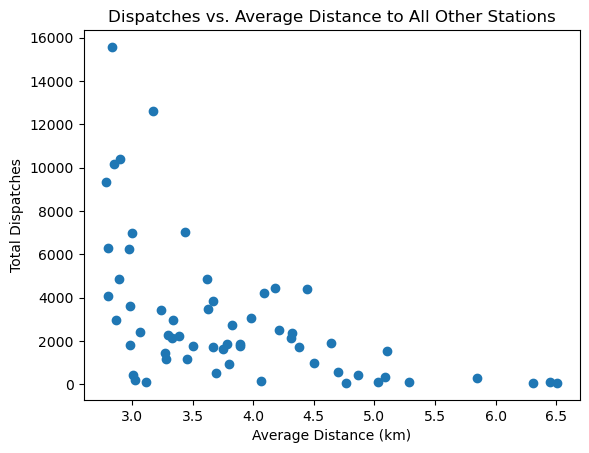

In [31]:
plt.scatter(startstationids['AvgDistance'], startstationids['Total'])
plt.title('Dispatches vs. Average Distance to All Other Stations')
plt.xlabel('Average Distance (km)')
plt.ylabel('Total Dispatches')
plt.show()

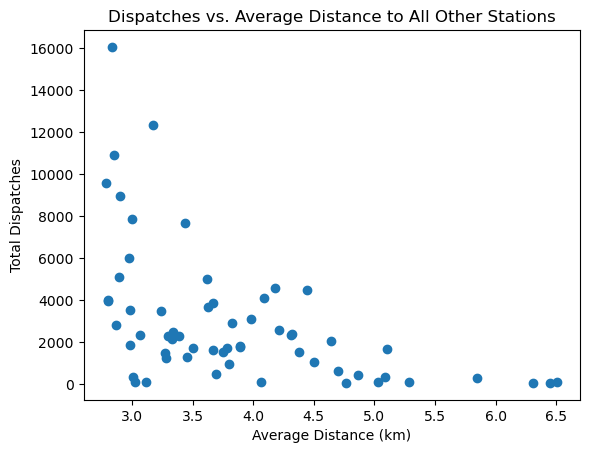

In [32]:
plt.scatter(endstationids['AvgDistance'], endstationids['Total'])
plt.title('Dispatches vs. Average Distance to All Other Stations')
plt.xlabel('Average Distance (km)')
plt.ylabel('Total Dispatches')
plt.show()

### Is there an exponential relationship between Dispatches and Average Distance?
Upon examining the plots above, we concluded that there is a nonlinear relationship between dispatches and average distance. Specifically, it appeared to be an exponential relationship, so we applied a log transformation to the y-axis (Dispatches).

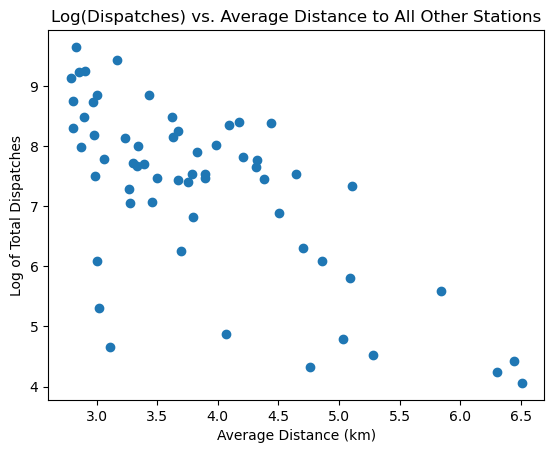

In [33]:
plt.scatter(startstationids['AvgDistance'], np.log(startstationids['Total']))
plt.title('Log(Dispatches) vs. Average Distance to All Other Stations')
plt.xlabel('Average Distance (km)')
plt.ylabel('Log of Total Dispatches')
plt.show()


Upon applying a log transformation to the y-axis, it can be seen that there now appears to be a linear relationship between Log of Total Dispatches and Average Distance, confirming that Total Dispatches and Average Distance have an exponential relationship. The strength of the linear plot above was checked using the correlation coefficient, shown below.

In [35]:
log_corr = np.corrcoef(startstationids['AvgDistance'], np.log(startstationids['Total']))[0, 1]
print(log_corr)

-0.685132152472576


### Section Summary and Conclusions:
Upon examining the scatterplots between Total Dispatches and Average Distance to All Other Stations, it is determined there is an exponential decay relationship between the two variables. This indicates that distance does have a significant effect on usage, as there is a steep drop off in dispatches beyond 3.5 km average distance. Thus, if new bike stations are to be constructed, an emphasis should be placed on minimizing average distance to all other stations, as the model shows that this is likely to increase usage.

## University Body vs. General Public Usage
In this section, we will examine if there is a significant difference in usage between biking stations on university grounds and biking stations in other areas of the City of Pittsburgh.

#### A new dataframe is created to find information specific to each unique bike route.

In [20]:
route_traveled_average_time = yeardata[['Start Station Id', 'Start Station Name', 'End Station Id', 'End Station Name', 'Duration']]

#### Total Number of Each Unique Bike Trip

In [21]:
route_traveled_average_time = route_traveled_average_time.groupby(
    ['Start Station Id', 'Start Station Name', 'End Station Id', 'End Station Name']
).agg(
    {'Duration': 'mean', 'Start Station Id': 'count'}
).rename(columns={'Duration': 'Average Route Duration', 'Start Station Id': 'Number of Trips'})
print(route_traveled_average_time.head(15))

                                                                                               Average Route Duration  \
Start Station Id Start Station Name       End Station Id End Station Name                                               
1                Pierce St & Summerlea St 1.0            Pierce St & Summerlea St                         6558.032258   
                                          2.0            Eliza Furnace Trail & Swineburne St              5472.666667   
                                          4.0            Burns White Center at 3 Crossings                3993.454545   
                                          6.0            10th St & Penn Ave                               1266.000000   
                                          7.0            Liberty Ave & Gross St                            534.705882   
                                          9.0            South Side Trail & S 4th St                      1701.000000   
                                

In [22]:
route_traveled_average_time['Average Route Duration'] /= 60

### Top 6 Routes Traveled:

Boulevard of the Allies & Parkview Ave    to    S Bouquet Ave & Sennott St <br>
Average Route Duration: 16.889613 min <br>
Number of Trips: 4,108 <br>

S Bouquet Ave & Sennott St    to    Boulevard of the Allies & Parkview Ave    (Reverse of Route Above) <br>
Average Route Duration: 12.404846 min <br>
Number of Trips: 3,787 <br>

N Dithridge St & Centre Ave    to    O'Hara St and University Place <br>
Average Route Duration: 10.484202 min <br>
Number of Trips: 2,737 <br>

O'Hara St and University Place    to    N Dithridge St & Centre Ave    (Reverse of Route In Previous Slide) <br>
Average Route Duration: 6.689241 min <br>
Number of Trips: 2,353 <br>

S Bouquet Ave & Sennott St    to    Zulema St & Coltart Ave <br>
Average Route Duration: 14.000111 min <br>
Number of Trips: 2,166 <br>

Forbes Ave & Schenley Dr    to    Boulevard of the Allies & Parkview Ave <br>
Average Route Duration: 12.672830 min <br>
Number of Trips: 2,053 <br>

#### From this code, as well as from manual checks from inputing each route into Google Maps the following information is garnered:

It is important to note that any bike route that begins and/or ends on Universtiy of Pittsburgh grounds, is considered Univeristy Commuting in this analysis. Also, X-Commuting means the trip travels through X-Location. Finally, X-Recreation means the trip both starts and ends at X-Location.

### Top 18 Routes in Total Number of Trips:

Number 1: 4,108 Trips (University Commuting)

Number 2: 3,787 Trips (University Commuting)

Number 3: 2,737 Trips (University Commuting)

Number 4: 2,353 Trips (University Commuting)

Number 5: 2,166 Trips (University Commuting)

Number 6: 2,053 Trips (Schenley Park Recreation)

Number 7: 2,044 Trips (Schenley Park Recreation)

Number 8: 2,027 Trips (University Commuting)

Number 9: 2,006 Trips (South Side Recreation)

Number 10: 1,999 Trips (University Commuting)

Number 11: 1,836 Trips (University Commuting)

Number 12: 1,504 Trips (University Commuting)

Number 13: 1,477 Trips (North Oakland Commuting)

Number 14: 1,454 Trips (University Commuting)

Number 15: 1,423 Trips (Downtown Recreation)

Number 16: 1,227 Trips (University Commuting)

Number 17: 1,155 Trips (North Oakland Commuting)

Number 18: 1,124 Trips (University Commuting)

### In the Top 18 Most Popular Routes:

Over the 12 Months documented, a total of 36,530 Trips were completed. 26,372 of those Trips were University Commuting, which is 72.19% of the total Trips. Also, 12 of the Top 18 were University Commuting, which is 66.67% of the Top 18 Most Popular Routes. 15 of the Top 18 were on average less than 20 minutes, which considereing University Students get Unlimited 30-minute bike rides, the average makes sense. Overall, over the 12 Months documented, a total of 168,658 Trips were completed. At least 15.64% of the total Trips were University Commuting. Due to a lack of time, I was unable to come up with a faster/automated way of checking for University Commuting Routes. This means that there is a chance that the 15.64% is larger in reality.

#### Types of POGOH Rider User and their Respective Percentage.

In [24]:
percentage_data = yeardata['Rider Type'].value_counts(normalize=True) * 100
print(percentage_data)

MEMBER    83.103677
CASUAL    16.896323
Name: Rider Type, dtype: float64


### Section Summary and Conclusions:

Pittsburgh University Commuting does not make up most of the total Pittsburgh bike usage in the city. However, it is a significantly large percentage with just the Top 18 Most Popular Routes. With 2,724 different observed routes, it was difficult to determine every type of route. As stated above, I could not get a final percentage of how truly large University Commuting is in the data. Considering Route Popularity Number 19 and Number 20 are also University Commuting: it is likely that final percentage is much larger than 15.64% of the total Trips.

General Public Commuting and Recreation is definitely an influential part in the total analysis. However, because it is split between too many different routes, the routes are not very consistent or popular, unlike University Commuting. Regardless, General Commuting and Recreation had 6 routes within the Top 18. Looking at these results, Money and Cost of Trips are not a significant factor since 83.1% of riders have pre-paid plans.

Therefore, the City of Pittsburgh is very accessible to both University Commuters and General Public Commuters / Recreationists. Large amount of bike-route use all throughout the city.

## Overall Conclusions
#### Convenience:

Station Convenient

Neighborhood Difference and Prediction on Station location

#### Distance:

Start and end station data can be used relatively interchangeably

Exponential decay relationship between total dispatches and average distance to all other stations

#### Main Type of Use:

The City of Pittsburgh is very accessible to both University Commuters and General Public Commuters / Recreationists.

Large amount of bike-route use all throughout the city.

### Therefore:

#### The City of Pittsburgh is truly the Bike Friendly City that was planned since 2020.​

#### The Bike(+) Master Plan has been successful.